In [1]:
import os
from pathlib import Path

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nb

## Behavioural data - CDS subscale  x metacognition in patients

In [3]:
stats = pd.read_csv("full_sample_stats.tsv", sep="\t", index_col=0)
mri_sample = pd.read_csv("mri_sample_stats.tsv", sep="\t", index_col=0)

# rename some variables for viz
select_name = ["Awareness:\ninteroceptive > extroceptive", 
               "Alienation from surroundings", 
               "Anomalous subjective recall", 
               "Emotion numbing", 
               "Anomalous body experience"]
select_var = ["HeartAwaremNoteAware", "AlienSurroundTot", "AnomSubRecTot", "EmoNumTot", "AnomBodyExpTot"]

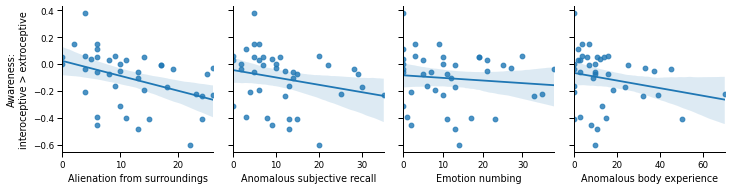

In [4]:
sns.set_context("paper")
data = stats[select_var]
data.columns = select_name
sns.pairplot(data, 
             x_vars=select_name[1:], 
             y_vars=select_name[0],
             kind="reg")

## Introception > extroception

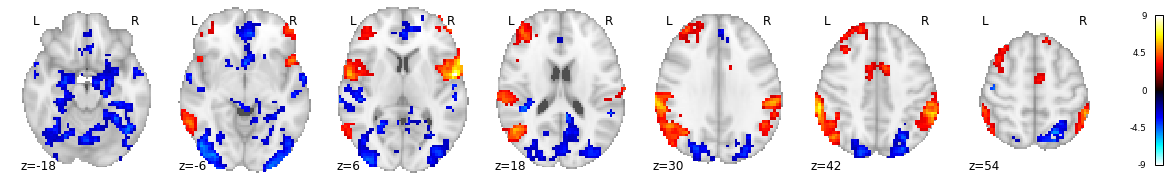

In [8]:
sig_tstat = "FSL_task/task_thresh_tstats.nii.gz"
plotting.plot_stat_map(sig_tstat, display_mode="z", 
                       cut_coords=range(-18, 59, 12),
                       draw_cross=False)

## PPI

probmap-gm-r86-insula_anterior_short_gyrus_L.nii.gz
probmap-gm-r87-insula_anterior_short_gyrus_R.nii.gz
probmap-gm-r88-insula_middle_short_gyrus_L.nii.gz
probmap-gm-r89-insula_middle_short_gyrus_R.nii.gz
probmap-gm-r92-insula_anterior_inferior_cortex_L.nii.gz
probmap-gm-r93-insula_anterior_inferior_cortex_R.nii.gz


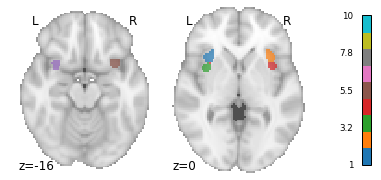

In [163]:
seed_dir = Path("../references/insular_masks")
for i, p in enumerate(sorted(list(seed_dir.glob("probmap-gm*")))):
    cur_path = str(p)
    if i == 0:
        roi = np.zeros(nb.load(p).get_fdata().shape)
    cur_roi = nb.load(p).get_fdata() * (i + 1)
    roi += cur_roi
    print(p.name)
roi_nii = nb.Nifti1Image(roi,
                         header=nb.load(p).header, 
                         affine=nb.load(p).affine)
plotting.plot_roi(roi_nii, display_mode="z", cut_coords=[-16, 0], 
                  cmap="tab10", colorbar=True, vmax=10)

## cope value x continutous HRV